# 基本介绍
随机森林（Random Forest）用于分类或回归任务（也就是给数据分组，或者预测数值）。如果你刚刚学习随机森林，可以把它理解成一支“聪明的树木团队”，它们通过“投票”来得出更准确的答案。

1. 随机森林的基本组成随机森林是由很多颗决策树组成的一个模型。你可以把每一颗决策树想象成一个“迷你专家”，它们擅长根据部分数据做出自己的判断。
2. 随机森林的“随机”在哪里？随机森林之所以叫“随机”，是因为在它的构建过程中引入了两种随机性：随机数据：每颗树不是用全部数据，而是用从数据中“随机抽取”的一部分。随机特征：每颗树在分裂的时候，只随机挑选部分特征来做判断，而不是用所有特征。这样，每颗树都会变得不同，相当于不同专家看问题的角度不一样。
3. 随机森林如何工作？当我们用随机森林来做预测时，整个过程可以分为以下几步：
- 训练阶段：a. 让一堆决策树各自独立学习数据。b. 每颗树学会自己的“问答逻辑”。
- 预测阶段：a. 当有新数据需要预测时，把这个数据丢给每一颗树。b. 每颗树给出自己的“答案”（分类问题中叫投票，回归问题中给出数值）。c. 森林综合所有树的答案，最终以少数服从多数（分类问题）或取平均值（回归问题）来给出最终结果。

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# # 1. 创建虚拟数据集
# np.random.seed(42)
# data_size = 10000
# data = {
#     'age': np.random.randint(18, 70, size=data_size),
#     'income': np.random.randint(20000, 120000, size=data_size),
#     'visits': np.random.poisson(5, size=data_size),
#     'time_on_site': np.random.exponential(5, size=data_size),
#     'click_through_rate': np.random.uniform(0, 1, size=data_size),
#     'previous_purchases': np.random.randint(0, 20, size=data_size),
#     'purchase': np.random.choice([0, 1], size=data_size, p=[0.7, 0.3]),
# }

# df = pd.DataFrame(data)

# # 2. 数据分析与可视化
# # 2.1 数据分布可视化
# plt.figure(figsize=(10, 6))
# sns.histplot(df['age'], kde=True, bins=30, color='blue')
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

# # 2.2 特征与目标变量的相关性
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Feature Correlation Heatmap')
# plt.show()

# # 2.3 目标变量分布
# plt.figure(figsize=(8, 5))
# sns.countplot(x='purchase', data=df, palette='Set2')
# plt.title('Target Variable Distribution (Purchase)')
# plt.xlabel('Purchase (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

# # 2.4 时间与购买的关系
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='purchase', y='time_on_site', data=df, palette='Set3')
# plt.title('Time on Site vs Purchase')
# plt.xlabel('Purchase (0=No, 1=Yes)')
# plt.ylabel('Time on Site')
# plt.show()

# # 3. 模型训练和预测
# # 准备数据
# X = df.drop('purchase', axis=1)
# y = df['purchase']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 初始化并训练模型
# rf = RandomForestClassifier(random_state=42, n_estimators=100)
# rf.fit(X_train, y_train)

# # 预测
# y_pred = rf.predict(X_test)
# y_prob = rf.predict_proba(X_test)[:, 1]

# # 4. 模型性能评估
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# # 绘制ROC曲线
# RocCurveDisplay.from_estimator(rf, X_test, y_test)
# plt.title("ROC Curve for Random Forest")
# plt.show()

# # 5. 超参数优化
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            scoring='roc_auc',
#                            cv=3,
#                            verbose=2,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

# # 使用最佳参数训练模型
# best_rf = grid_search.best_estimator_
# best_rf.fit(X_train, y_train)

# # 新模型预测与评估
# y_best_pred = best_rf.predict(X_test)
# y_best_prob = best_rf.predict_proba(X_test)[:, 1]

# print("Optimized Classification Report:\n", classification_report(y_test, y_best_pred))
# print("Optimized ROC AUC Score:", roc_auc_score(y_test, y_best_prob))

In [4]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# # 1. 创建虚拟数据集
# np.random.seed(42)
# data_size = 10000
# data = {
#     'age': np.random.randint(18, 70, size=data_size),
#     'income': np.random.randint(20000, 120000, size=data_size),
#     'visits': np.random.poisson(5, size=data_size),
#     'time_on_site': np.random.exponential(5, size=data_size),
#     'click_through_rate': np.random.uniform(0, 1, size=data_size),
#     'previous_purchases': np.random.randint(0, 20, size=data_size),
#     'purchase': np.random.choice([0, 1], size=data_size, p=[0.7, 0.3]),
# }

# df = pd.DataFrame(data)

# # 2. 数据分析与可视化
# # 2.1 数据分布可视化
# plt.figure(figsize=(10, 6))
# sns.histplot(df['age'], kde=True, bins=30, color='blue')
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.show()

# # 2.2 特征与目标变量的相关性
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Feature Correlation Heatmap')
# plt.show()

# # 2.3 目标变量分布
# plt.figure(figsize=(8, 5))
# sns.countplot(x='purchase', data=df, palette='Set2')
# plt.title('Target Variable Distribution (Purchase)')
# plt.xlabel('Purchase (0=No, 1=Yes)')
# plt.ylabel('Count')
# plt.show()

# # 2.4 时间与购买的关系
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='purchase', y='time_on_site', data=df, palette='Set3')
# plt.title('Time on Site vs Purchase')
# plt.xlabel('Purchase (0=No, 1=Yes)')
# plt.ylabel('Time on Site')
# plt.show()

# # 3. 模型训练和预测
# # 准备数据
# X = df.drop('purchase', axis=1)
# y = df['purchase']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # 初始化并训练模型
# rf = RandomForestClassifier(random_state=42, n_estimators=100)
# rf.fit(X_train, y_train)

# # 预测
# y_pred = rf.predict(X_test)
# y_prob = rf.predict_proba(X_test)[:, 1]

# # 4. 模型性能评估
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# # 绘制ROC曲线
# RocCurveDisplay.from_estimator(rf, X_test, y_test)
# plt.title("ROC Curve for Random Forest")
# plt.show()

# # 5. 超参数优化
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            scoring='roc_auc',
#                            cv=3,
#                            verbose=2,
#                            n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

# # 使用最佳参数训练模型
# best_rf = grid_search.best_estimator_
# best_rf.fit(X_train, y_train)

# # 新模型预测与评估
# y_best_pred = best_rf.predict(X_test)
# y_best_prob = best_rf.predict_proba(X_test)[:, 1]

# print("Optimized Classification Report:\n", classification_report(y_test, y_best_pred))
# print("Optimized ROC AUC Score:", roc_auc_score(y_test, y_best_prob))

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

https://mp.weixin.qq.com/s/3ts0u7opeUbC5tsuVgHlbg

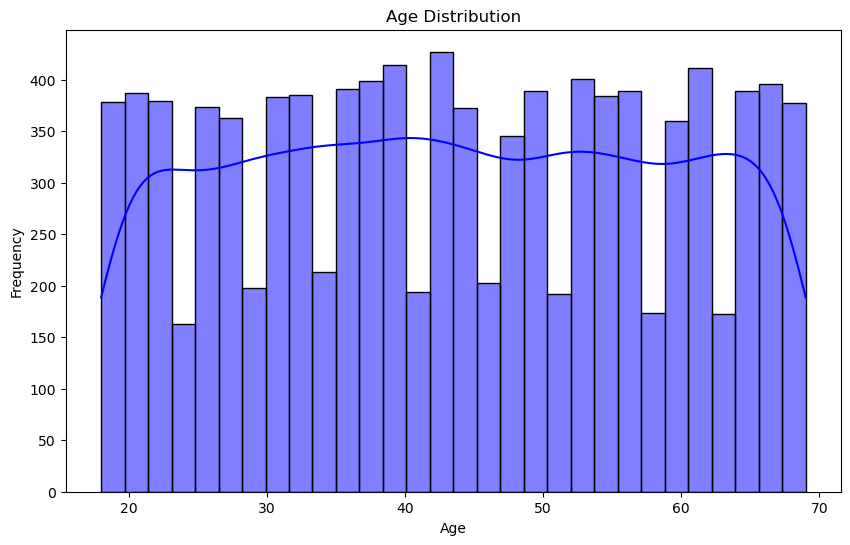

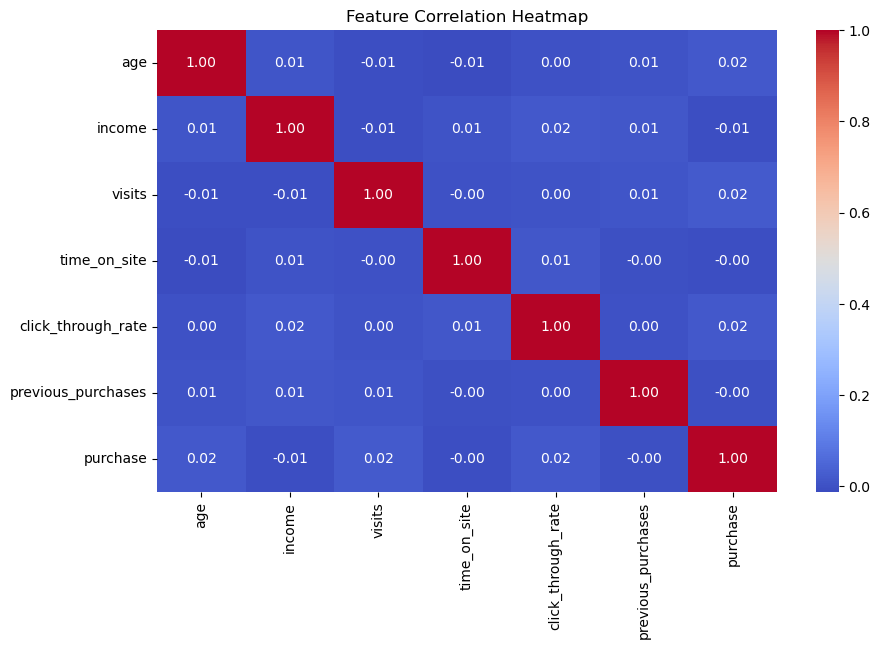

C:\Users\asus\AppData\Local\Temp\ipykernel_34668\2452559950.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase', data=df, palette='Set2')


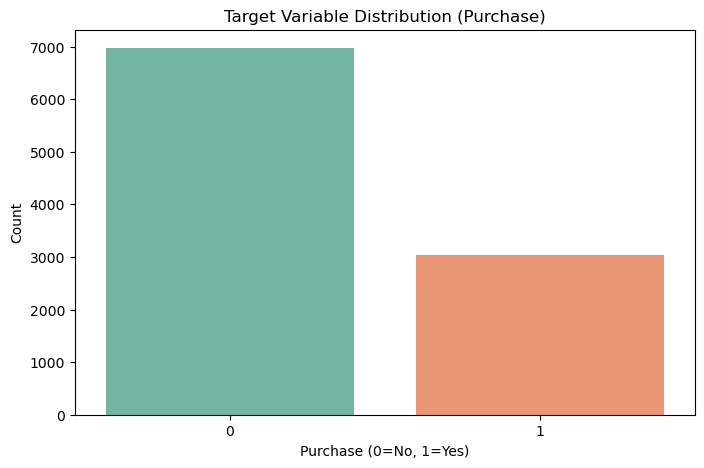

C:\Users\asus\AppData\Local\Temp\ipykernel_34668\2452559950.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='purchase', y='time_on_site', data=df, palette='Set3')


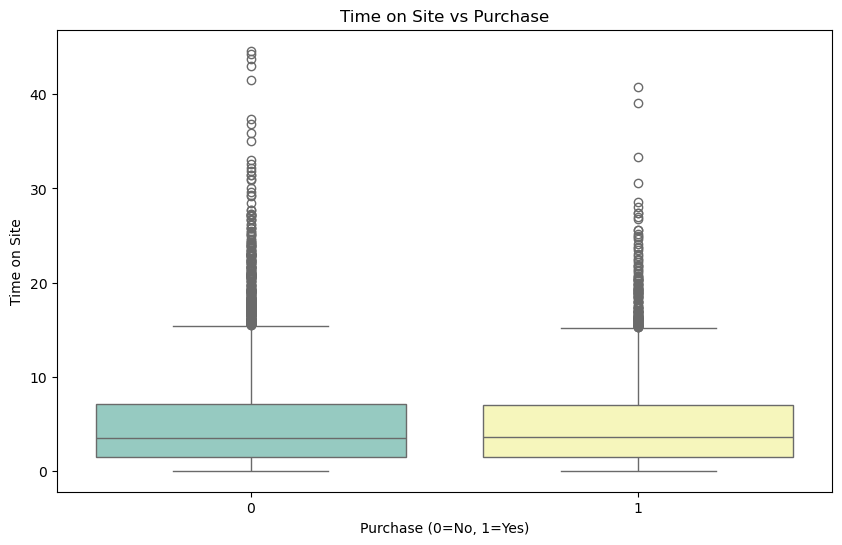

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.97      0.81      2105
           1       0.32      0.03      0.06       895

    accuracy                           0.69      3000
   macro avg       0.51      0.50      0.44      3000
weighted avg       0.59      0.69      0.59      3000

Confusion Matrix:
 [[2042   63]
 [ 866   29]]
ROC AUC Score: 0.48566966122161914


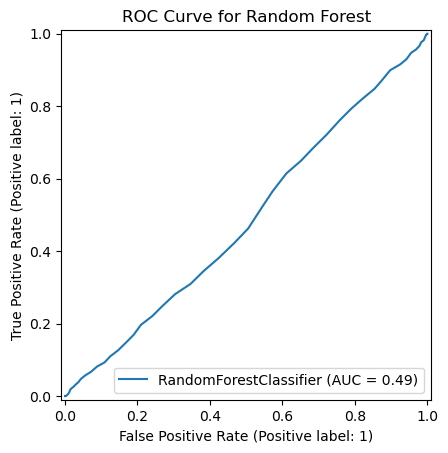

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.99      0.82      2105
           1       0.29      0.01      0.02       895

    accuracy                           0.70      3000
   macro avg       0.50      0.50      0.42      3000
weighted avg       0.58      0.70      0.58      3000

Optimized ROC AUC Score: 0.48947305564033494


In [2]:
# 1. 创建虚拟数据集
np.random.seed(42)
data_size = 10000
data = {
    'age': np.random.randint(18, 70, size=data_size),
    'income': np.random.randint(20000, 120000, size=data_size),
    'visits': np.random.poisson(5, size=data_size),
    'time_on_site': np.random.exponential(5, size=data_size),
    'click_through_rate': np.random.uniform(0, 1, size=data_size),
    'previous_purchases': np.random.randint(0, 20, size=data_size),
    'purchase': np.random.choice([0, 1], size=data_size, p=[0.7, 0.3]),
}

df = pd.DataFrame(data)

# 2. 数据分析与可视化
# 2.1 数据分布可视化
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2.2 特征与目标变量的相关性
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# 2.3 目标变量分布
plt.figure(figsize=(8, 5))
sns.countplot(x='purchase', data=df, palette='Set2')
plt.title('Target Variable Distribution (Purchase)')
plt.xlabel('Purchase (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

# 2.4 时间与购买的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='purchase', y='time_on_site', data=df, palette='Set3')
plt.title('Time on Site vs Purchase')
plt.xlabel('Purchase (0=No, 1=Yes)')
plt.ylabel('Time on Site')
plt.show()

# 3. 模型训练和预测
# 准备数据
X = df.drop('purchase', axis=1)
y = df['purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化并训练模型
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# 预测
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# 4. 模型性能评估
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# 绘制ROC曲线
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve for Random Forest")
plt.show()

# 5. 超参数优化
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

# 使用最佳参数训练模型
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# 新模型预测与评估
y_best_pred = best_rf.predict(X_test)
y_best_prob = best_rf.predict_proba(X_test)[:, 1]

print("Optimized Classification Report:\n", classification_report(y_test, y_best_pred))
print("Optimized ROC AUC Score:", roc_auc_score(y_test, y_best_prob))

整个的案例，包括以下的部分，构造虚拟数据集数据分析与可视化模型训练和预测模型优化与超参数调整模型性能评估
案例描述假设我们有一个虚拟的电子商务数据集，目标是根据用户行为特征预测是否会发生购买行为。